<a href="https://colab.research.google.com/github/ArshiaTalwar/SheDetects/blob/main/SheDetect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
from google.colab import files
files.upload()  # Upload the kaggle.json file


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"arshiatalwar","key":"54a4e2950737b560af3640fe5b37ec08"}'}

In [ ]:
!mkdir -p ~/.kaggle  # Create .kaggle folder if not exists
!mv kaggle.json ~/.kaggle/  # Move kaggle.json to this folder
!chmod 600 ~/.kaggle/kaggle.json  # Set permissions


In [ ]:
!kaggle datasets download -d paultimothymooney/breast-histopathology-images



Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/breast-histopathology-images
License(s): CC0-1.0


In [ ]:
import os
import zipfile

zip_path = "breast-histopathology-images.zip"  # ZIP file
extract_path = "/content/breast_cancer_data"   # Target folder

# Check if extraction folder already exists
if os.path.exists(extract_path):
    print("⚠️ Dataset folder already exists. Skipping extraction.")
else:
    print("✅ Extracting dataset... Please wait.")

    # Extract using Python (avoids overwrite prompt)
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)

    print("✅ Extraction complete! Files are in:", extract_path)


✅ Extracting dataset... Please wait.
✅ Extraction complete! Files are in: /content/breast_cancer_data


In [ ]:
import os

dataset_path = "/content/breast_cancer_data"

# Check if the dataset folder exists
if os.path.exists(dataset_path):
    print("✅ Dataset extracted successfully at:", dataset_path)

    # List first 10 files/folders
    print("📂 Contents:")
    print(os.listdir(dataset_path)[:10])
else:
    print("❌ Dataset folder not found! Extraction may have failed.")


✅ Dataset extracted successfully at: /content/breast_cancer_data
📂 Contents:
['14304', '10257', '15514', '12949', '14157', '10302', '8918', '10292', '12895', '9226']


In [ ]:

#Import the necessary libraries first

import tensorflow as tf
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.metrics import categorical_crossentropy
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D
from keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense, AvgPool2D,MaxPool2D
from keras.models import Sequential, Model
from keras.optimizers import Adam
import cv2

In [ ]:
data = '/content/breast_cancer_data/10264'
No_breast_cancer = '/content/breast_cancer_data/10264/No'
Yes_breast_cancer = '/content/breast_cancer_data/10264/Yes'


In [ ]:
data = "/content/breast_cancer_data/10264"
No_breast_cancer = os.path.join(data, "0")  # Path for No Cancer
Yes_breast_cancer = os.path.join(data, "1")  # Path for Yes Cancer

print("No Cancer Folder:", No_breast_cancer)
print("Yes Cancer Folder:", Yes_breast_cancer)


No Cancer Folder: /content/breast_cancer_data/10264/0
Yes Cancer Folder: /content/breast_cancer_data/10264/1


In [ ]:
ls /content/breast_cancer_data/


10253/  10293/  12823/  12897/  13022/  14078/  15513/  16570/  9041/  9255/
10254/  10295/  12824/  12898/  13023/  14079/  15514/  16895/  9043/  9256/
10255/  10299/  12826/  12900/  13024/  14081/  15515/  16896/  9044/  9257/
10256/  10300/  12867/  12901/  13025/  14082/  15516/  8863/   9073/  9258/
10257/  10301/  12868/  12905/  13106/  14153/  15632/  8864/   9075/  9259/
10258/  10302/  12869/  12906/  13400/  14154/  15633/  8865/   9076/  9260/
10259/  10303/  12870/  12907/  13401/  14155/  15634/  8867/   9077/  9261/
10260/  10304/  12871/  12908/  13402/  14156/  15839/  8913/   9078/  9262/
10261/  10305/  12872/  12909/  13403/  14157/  15840/  8914/   9081/  9265/
10262/  10306/  12873/  12910/  13404/  14188/  15902/  8916/   9083/  9266/
10264/  10307/  12875/  12911/  13458/  14189/  15903/  8917/   9123/  9267/
10268/  10308/  12876/  12929/  13459/  14190/  16014/  8918/   9124/  9290/
10269/  12241/  12877/  12930/  13460/  14191/  16085/  8950/   9125/  9291/

In [ ]:
import os

path = "/content/breast_cancer_data/10264"

if os.path.exists(path):
    print("✅ Found 10264! Listing contents...")
    print(os.listdir(path))  # Show files/folders inside "10264"
else:
    print("❌ Error: Folder 10264 not found!")


✅ Found 10264! Listing contents...
['0', '1']


In [ ]:
dirlist=[No_breast_cancer, Yes_breast_cancer]
classes=['0', '1']
filepaths=[]
labels=[]
for i,j in zip(dirlist, classes):
    filelist=os.listdir(i)
    for f in filelist:
        filepath=os.path.join (i,f)
        filepaths.append(filepath)
        labels.append(j)
print ('filepaths: ', len(filepaths), '   labels: ', len(labels))


filepaths:  1204    labels:  1204


In [ ]:
Files=pd.Series(filepaths, name='filepaths')
Label=pd.Series(labels, name='labels')
df=pd.concat([Files,Label], axis=1)
df=pd.DataFrame(np.array(df).reshape(1204,2), columns = ['filepaths', 'labels'])
df.head()

,filepaths,labels
0,/content/breast_cancer_data/10264/0/10264_idx5...,0
1,/content/breast_cancer_data/10264/0/10264_idx5...,0
2,/content/breast_cancer_data/10264/0/10264_idx5...,0
3,/content/breast_cancer_data/10264/0/10264_idx5...,0
4,/content/breast_cancer_data/10264/0/10264_idx5...,0


In [ ]:
print(df['labels'].value_counts())

labels
0    617
1    587
Name: count, dtype: int64


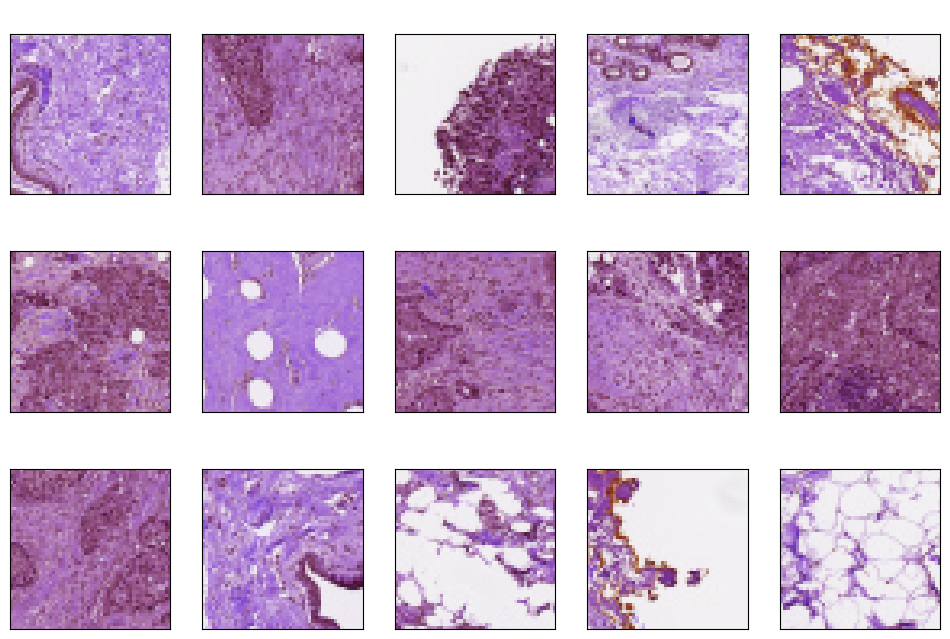

In [ ]:
plt.figure(figsize=(12,8))
for i in range(15):
    random = np.random.randint(1,len(df))
    plt.subplot(3,5,i+1)
    plt.imshow(cv2.imread(df.loc[random,"filepaths"]))
    plt.title(df.loc[random, "labels"], size = 15, color = "white")
    plt.xticks([])
    plt.yticks([])

plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, train_size=0.95, random_state=0)
train_new, valid = train_test_split(train, train_size=0.90, random_state=0)

print(f"train set shape: {train_new.shape}")
print(f"test set shape: {test.shape}")
print(f"validation set shape: {valid.shape}")


train set shape: (1028, 2)
test set shape: (61, 2)
validation set shape: (115, 2)


In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255.,rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2,
                                   shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True, vertical_flip =True)
test_datagen = ImageDataGenerator(rescale = 1.0/255.)

In [ ]:
train_gen = train_datagen.flow_from_dataframe(dataframe = train_new,
                                              x_col = 'filepaths', y_col ='labels',
                                              target_size = (224,224), batch_size = 32,
                                              class_mode = 'binary', shuffle = True)
val_gen = train_datagen.flow_from_dataframe(valid,
                                            target_size=(224,224), x_col = 'filepaths', y_col ='labels',
                                            class_mode='binary',
                                            batch_size= 16, shuffle=True)
test_gen = test_datagen.flow_from_dataframe(test,
                                            target_size = (224,224), x_col = 'filepaths', y_col ='labels',
                                             class_mode = 'binary',
                                            batch_size = 16, shuffle = False)

Found 1028 validated image filenames belonging to 2 classes.
Found 115 validated image filenames belonging to 2 classes.
Found 61 validated image filenames belonging to 2 classes.


In [ ]:
train_gen.class_indices


{'0': 0, '1': 1}

In [ ]:
from tensorflow import keras
base_model = keras.applications.ResNet50V2(
    weights="imagenet",  # Load weights pre-trained on ImageNet.
    input_shape=(224, 224, 3),
    include_top=False,
)  # Do not include the ImageNet classifier at the top.

# Freeze the base_model
base_model.trainable = False

# Create new model on top
inputs = keras.Input(shape=(224, 224, 3))


# The base model contains batchnorm layers. We want to keep them in inference mode
# when we unfreeze the base model for fine-tuning, so we make sure that the
# base_model is running in inference mode here.
x = base_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.2)(x)  # Regularize with dropout
outputs = keras.layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)

model.summary()

94668760/94668760 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resnet50v2 (Functional)              │ (None, 7, 7, 2048)          │      23,564,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │           2,049 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,566,849 (89.90 MB)

 Trainable params: 2,049 (8.00 KB)

 Non-trainable params: 23,564,800 (89.89 MB)

In [ ]:
callbacks = [
    tf.keras.callbacks.ModelCheckpoint("Tumor_classifier_model.h5", save_best_only=True, verbose = 0)
]





model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate= 0.0001), metrics=['accuracy'])


history = model.fit(train_gen, validation_data = val_gen, epochs = 100,
                    callbacks = [callbacks], verbose = 1)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 512ms/step - accuracy: 0.6604 - loss: 0.6203

33/33 ━━━━━━━━━━━━━━━━━━━━ 43s 856ms/step - accuracy: 0.6610 - loss: 0.6199 - val_accuracy: 0.7304 - val_loss: 0.5565
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step - accuracy: 0.6981 - loss: 0.5814

33/33 ━━━━━━━━━━━━━━━━━━━━ 15s 457ms/step - accuracy: 0.6983 - loss: 0.5811 - val_accuracy: 0.7217 - val_loss: 0.5244
Epoch 3/100
32/33 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step - accuracy: 0.7275 - loss: 0.5473

33/33 ━━━━━━━━━━━━━━━━━━━━ 15s 459ms/step - accuracy: 0.7276 - loss: 0.5473 - val_accuracy: 0.7913 - val_loss: 0.4883
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step - accuracy: 0.7790 - loss: 0.4969

33/33 ━━━━━━━━━━━━━━━━━━━━ 20s 457ms/step - accuracy: 0.7787 - loss: 0.4971 - val_accuracy: 0.8087 - val_loss: 0.4693
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step - accuracy: 0.7765 - loss: 0.4796

33/33 ━━━━━━━━━━━━━━━━━━━━ 15s 455ms/step - accuracy: 0.7766 - loss: 0.4797 - val_accuracy: 0.7913 - val_loss: 0.4645
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - accuracy: 0.8012 - loss: 0.4719

33/33 ━━━━━━━━━━━━━━━━━━━━ 16s 483ms/step - accuracy: 0.8012 - loss: 0.4718 - val_accuracy: 0.8435 - val_loss: 0.4336
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step - accuracy: 0.8162 - loss: 0.4490

33/33 ━━━━━━━━━━━━━━━━━━━━ 15s 448ms/step - accuracy: 0.8162 - loss: 0.4490 - val_accuracy: 0.8522 - val_loss: 0.4191
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step - accuracy: 0.8270 - loss: 0.4197

33/33 ━━━━━━━━━━━━━━━━━━━━ 15s 461ms/step - accuracy: 0.8271 - loss: 0.4199 - val_accuracy: 0.8435 - val_loss: 0.3981
Epoch 9/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 14s 432ms/step - accuracy: 0.8188 - loss: 0.4340 - val_accuracy: 0.8348 - val_loss: 0.4045
Epoch 10/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step - accuracy: 0.8614 - loss: 0.3948

33/33 ━━━━━━━━━━━━━━━━━━━━ 15s 449ms/step - accuracy: 0.8612 - loss: 0.3949 - val_accuracy: 0.8870 - val_loss: 0.3803
Epoch 11/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 20s 436ms/step - accuracy: 0.8345 - loss: 0.4097 - val_accuracy: 0.8522 - val_loss: 0.3866
Epoch 12/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step - accuracy: 0.8410 - loss: 0.3832

33/33 ━━━━━━━━━━━━━━━━━━━━ 15s 454ms/step - accuracy: 0.8411 - loss: 0.3834 - val_accuracy: 0.9130 - val_loss: 0.3255
Epoch 13/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 15s 445ms/step - accuracy: 0.8291 - loss: 0.3906 - val_accuracy: 0.8522 - val_loss: 0.3823
Epoch 14/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 15s 445ms/step - accuracy: 0.8634 - loss: 0.3559 - val_accuracy: 0.8783 - val_loss: 0.3794
Epoch 15/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 14s 431ms/step - accuracy: 0.8624 - loss: 0.3566 - val_accuracy: 0.9043 - val_loss: 0.3369
Epoch 16/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step - accuracy: 0.8612 - loss: 0.3637

33/33 ━━━━━━━━━━━━━━━━━━━━ 15s 453ms/step - accuracy: 0.8612 - loss: 0.3637 - val_accuracy: 0.9304 - val_loss: 0.3220
Epoch 17/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 14s 437ms/step - accuracy: 0.8848 - loss: 0.3581 - val_accuracy: 0.8957 - val_loss: 0.3489
Epoch 18/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step - accuracy: 0.8530 - loss: 0.3638

33/33 ━━━━━━━━━━━━━━━━━━━━ 16s 498ms/step - accuracy: 0.8535 - loss: 0.3634 - val_accuracy: 0.8870 - val_loss: 0.3086
Epoch 19/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step - accuracy: 0.8732 - loss: 0.3158

33/33 ━━━━━━━━━━━━━━━━━━━━ 15s 452ms/step - accuracy: 0.8734 - loss: 0.3161 - val_accuracy: 0.9043 - val_loss: 0.2778
Epoch 20/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 20s 437ms/step - accuracy: 0.8544 - loss: 0.3427 - val_accuracy: 0.8957 - val_loss: 0.3217
Epoch 21/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 16s 486ms/step - accuracy: 0.8750 - loss: 0.3376 - val_accuracy: 0.8696 - val_loss: 0.3136
Epoch 22/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 14s 434ms/step - accuracy: 0.8693 - loss: 0.3401 - val_accuracy: 0.9130 - val_loss: 0.3201
Epoch 23/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 14s 431ms/step - accuracy: 0.8747 - loss: 0.3271 - val_accuracy: 0.8957 - val_loss: 0.3080
Epoch 24/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 15s 442ms/step - accuracy: 0.9085 - loss: 0.2888 - val_accuracy: 0.9391 - val_loss: 0.2819
Epoch 25/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 15s 443ms/step - accuracy: 0.8880 - loss: 0.3053 - val_accuracy: 0.8783 - val_loss: 0.3017
Epoch 26/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 16s 476ms/step - accuracy: 0.9172 - loss: 0.2739 - val_a

33/33 ━━━━━━━━━━━━━━━━━━━━ 15s 446ms/step - accuracy: 0.8969 - loss: 0.2939 - val_accuracy: 0.9304 - val_loss: 0.2398
Epoch 31/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 15s 470ms/step - accuracy: 0.8607 - loss: 0.3192 - val_accuracy: 0.8957 - val_loss: 0.2777
Epoch 32/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step - accuracy: 0.8948 - loss: 0.2946

33/33 ━━━━━━━━━━━━━━━━━━━━ 16s 502ms/step - accuracy: 0.8949 - loss: 0.2945 - val_accuracy: 0.9304 - val_loss: 0.2368
Epoch 33/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 19s 440ms/step - accuracy: 0.9113 - loss: 0.2681 - val_accuracy: 0.9043 - val_loss: 0.2676
Epoch 34/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 15s 454ms/step - accuracy: 0.8890 - loss: 0.2899 - val_accuracy: 0.9130 - val_loss: 0.2875
Epoch 35/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 20s 437ms/step - accuracy: 0.9022 - loss: 0.3097 - val_accuracy: 0.8870 - val_loss: 0.2528
Epoch 36/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 14s 431ms/step - accuracy: 0.8903 - loss: 0.3059 - val_accuracy: 0.9043 - val_loss: 0.2831
Epoch 37/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 16s 470ms/step - accuracy: 0.8978 - loss: 0.2865 - val_accuracy: 0.9130 - val_loss: 0.2724
Epoch 38/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 14s 433ms/step - accuracy: 0.9156 - loss: 0.2780 - val_accuracy: 0.9217 - val_loss: 0.2719
Epoch 39/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 14s 435ms/step - accuracy: 0.9054 - loss: 0.2804 - val_a

33/33 ━━━━━━━━━━━━━━━━━━━━ 16s 487ms/step - accuracy: 0.9135 - loss: 0.2692 - val_accuracy: 0.9304 - val_loss: 0.2260
Epoch 43/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 14s 431ms/step - accuracy: 0.9113 - loss: 0.2462 - val_accuracy: 0.9304 - val_loss: 0.2538
Epoch 44/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step - accuracy: 0.9118 - loss: 0.2534

33/33 ━━━━━━━━━━━━━━━━━━━━ 15s 444ms/step - accuracy: 0.9115 - loss: 0.2540 - val_accuracy: 0.9304 - val_loss: 0.2166
Epoch 45/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 15s 440ms/step - accuracy: 0.9061 - loss: 0.2669 - val_accuracy: 0.9391 - val_loss: 0.2419
Epoch 46/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 15s 440ms/step - accuracy: 0.9152 - loss: 0.2459 - val_accuracy: 0.9217 - val_loss: 0.2769
Epoch 47/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 16s 471ms/step - accuracy: 0.9088 - loss: 0.2685 - val_accuracy: 0.9130 - val_loss: 0.2394
Epoch 48/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 16s 470ms/step - accuracy: 0.9062 - loss: 0.2680 - val_accuracy: 0.9043 - val_loss: 0.2723
Epoch 49/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 14s 447ms/step - accuracy: 0.8939 - loss: 0.2979 - val_accuracy: 0.9217 - val_loss: 0.2539
Epoch 50/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step - accuracy: 0.9228 - loss: 0.2443

33/33 ━━━━━━━━━━━━━━━━━━━━ 15s 447ms/step - accuracy: 0.9227 - loss: 0.2446 - val_accuracy: 0.9304 - val_loss: 0.2155
Epoch 51/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 14s 434ms/step - accuracy: 0.9156 - loss: 0.2510 - val_accuracy: 0.9565 - val_loss: 0.2163
Epoch 52/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 16s 471ms/step - accuracy: 0.9191 - loss: 0.2532 - val_accuracy: 0.9304 - val_loss: 0.2237
Epoch 53/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - accuracy: 0.9080 - loss: 0.2824

33/33 ━━━━━━━━━━━━━━━━━━━━ 15s 457ms/step - accuracy: 0.9082 - loss: 0.2817 - val_accuracy: 0.9304 - val_loss: 0.2139
Epoch 54/100
32/33 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step - accuracy: 0.9157 - loss: 0.2770

33/33 ━━━━━━━━━━━━━━━━━━━━ 15s 447ms/step - accuracy: 0.9155 - loss: 0.2762 - val_accuracy: 0.9391 - val_loss: 0.2137
Epoch 55/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 15s 440ms/step - accuracy: 0.9171 - loss: 0.2305 - val_accuracy: 0.9217 - val_loss: 0.2243
Epoch 56/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 14s 436ms/step - accuracy: 0.9136 - loss: 0.2492 - val_accuracy: 0.9130 - val_loss: 0.2515
Epoch 57/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step - accuracy: 0.9287 - loss: 0.2426

33/33 ━━━━━━━━━━━━━━━━━━━━ 16s 484ms/step - accuracy: 0.9284 - loss: 0.2425 - val_accuracy: 0.9217 - val_loss: 0.2077
Epoch 58/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 15s 440ms/step - accuracy: 0.9249 - loss: 0.2424 - val_accuracy: 0.8957 - val_loss: 0.2319
Epoch 59/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 15s 441ms/step - accuracy: 0.9338 - loss: 0.2219 - val_accuracy: 0.9304 - val_loss: 0.2120
Epoch 60/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step - accuracy: 0.9443 - loss: 0.2189

33/33 ━━━━━━━━━━━━━━━━━━━━ 15s 454ms/step - accuracy: 0.9438 - loss: 0.2197 - val_accuracy: 0.9391 - val_loss: 0.2033
Epoch 61/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 20s 442ms/step - accuracy: 0.9121 - loss: 0.2349 - val_accuracy: 0.9130 - val_loss: 0.2240
Epoch 62/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 14s 436ms/step - accuracy: 0.9168 - loss: 0.2441 - val_accuracy: 0.9130 - val_loss: 0.2353
Epoch 63/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 14s 439ms/step - accuracy: 0.9182 - loss: 0.2203 - val_accuracy: 0.9217 - val_loss: 0.2139
Epoch 64/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 14s 428ms/step - accuracy: 0.9216 - loss: 0.2323 - val_accuracy: 0.9130 - val_loss: 0.2242
Epoch 65/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 15s 461ms/step - accuracy: 0.9137 - loss: 0.2492 - val_accuracy: 0.9130 - val_loss: 0.2248
Epoch 66/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 20s 445ms/step - accuracy: 0.9356 - loss: 0.2182 - val_accuracy: 0.9130 - val_loss: 0.2586
Epoch 67/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 15s 440ms/step - accuracy: 0.9154 - loss: 0.2516 - val_a

33/33 ━━━━━━━━━━━━━━━━━━━━ 15s 453ms/step - accuracy: 0.9129 - loss: 0.2247 - val_accuracy: 0.9304 - val_loss: 0.1921
Epoch 71/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 16s 473ms/step - accuracy: 0.9033 - loss: 0.2383 - val_accuracy: 0.9217 - val_loss: 0.2116
Epoch 72/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 14s 436ms/step - accuracy: 0.9170 - loss: 0.2212 - val_accuracy: 0.9217 - val_loss: 0.2111
Epoch 73/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 14s 434ms/step - accuracy: 0.9188 - loss: 0.2323 - val_accuracy: 0.9217 - val_loss: 0.2023
Epoch 74/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 14s 433ms/step - accuracy: 0.9065 - loss: 0.2496 - val_accuracy: 0.9217 - val_loss: 0.1961
Epoch 75/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 15s 441ms/step - accuracy: 0.9169 - loss: 0.2217 - val_accuracy: 0.9391 - val_loss: 0.2072
Epoch 76/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 15s 444ms/step - accuracy: 0.9155 - loss: 0.2289 - val_accuracy: 0.9043 - val_loss: 0.2350
Epoch 77/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 15s 453ms/step - accuracy: 0.9267 - loss: 0.2162 - val_a

33/33 ━━━━━━━━━━━━━━━━━━━━ 16s 477ms/step - accuracy: 0.9014 - loss: 0.2485 - val_accuracy: 0.9565 - val_loss: 0.1769
Epoch 82/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 14s 438ms/step - accuracy: 0.9241 - loss: 0.2359 - val_accuracy: 0.9391 - val_loss: 0.2127
Epoch 83/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 15s 440ms/step - accuracy: 0.9089 - loss: 0.2388 - val_accuracy: 0.9217 - val_loss: 0.2415
Epoch 84/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 14s 430ms/step - accuracy: 0.9243 - loss: 0.2185 - val_accuracy: 0.9130 - val_loss: 0.2172
Epoch 85/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 14s 434ms/step - accuracy: 0.9101 - loss: 0.2477 - val_accuracy: 0.9304 - val_loss: 0.2109
Epoch 86/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 15s 445ms/step - accuracy: 0.9210 - loss: 0.2300 - val_accuracy: 0.9391 - val_loss: 0.2210
Epoch 87/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 20s 437ms/step - accuracy: 0.9212 - loss: 0.2338 - val_accuracy: 0.9391 - val_loss: 0.1771
Epoch 88/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 14s 433ms/step - accuracy: 0.9014 - loss: 0.2499 - val_a

33/33 ━━━━━━━━━━━━━━━━━━━━ 15s 455ms/step - accuracy: 0.9184 - loss: 0.2191 - val_accuracy: 0.9565 - val_loss: 0.1513
Epoch 92/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 14s 432ms/step - accuracy: 0.9274 - loss: 0.2288 - val_accuracy: 0.9304 - val_loss: 0.1930
Epoch 93/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 14s 435ms/step - accuracy: 0.9280 - loss: 0.2113 - val_accuracy: 0.9304 - val_loss: 0.2086
Epoch 94/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 14s 438ms/step - accuracy: 0.9099 - loss: 0.2443 - val_accuracy: 0.9304 - val_loss: 0.2158
Epoch 95/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 16s 481ms/step - accuracy: 0.9105 - loss: 0.2495 - val_accuracy: 0.9043 - val_loss: 0.2185
Epoch 96/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 14s 432ms/step - accuracy: 0.9260 - loss: 0.2184 - val_accuracy: 0.9217 - val_loss: 0.2021
Epoch 97/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 14s 436ms/step - accuracy: 0.9216 - loss: 0.2199 - val_accuracy: 0.8957 - val_loss: 0.2246
Epoch 98/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 14s 436ms/step - accuracy: 0.9189 - loss: 0.2339 - val_a

In [ ]:

model.save("model.h5")


In [ ]:
final_val_acc = history.history['val_accuracy'][-1]
print("Final Validation Accuracy:", final_val_acc * 100, "%")


Final Validation Accuracy: 93.04347634315491 %


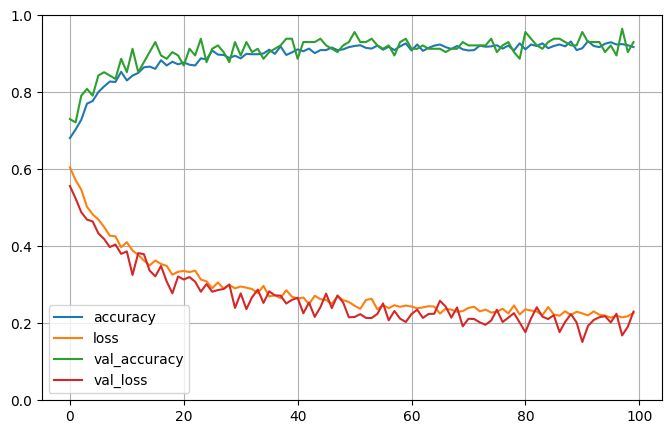

In [ ]:

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)

plt.show()

In [ ]:

from PIL import Image
model_path = "model.h5"
loaded_model = tf.keras.models.load_model(model_path)

# import matplotlib.pyplot as plt
import numpy as np

image = cv2.imread("/content/breast_cancer_data/10264/0/10264_idx5_x1201_y451_class0.png")

image_fromarray = Image.fromarray(image, 'RGB')
resize_image = image_fromarray.resize((224, 224))
expand_input = np.expand_dims(resize_image,axis=0)
input_data = np.array(expand_input)
input_data = input_data/255

pred = loaded_model.predict(input_data)
if pred >= 0.5:
  print("Yes")
else:
  print("No")


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
Yes


In [ ]:
import os
import tensorflow as tf
import numpy as np
import cv2
from PIL import Image

# Load the trained model
model_path = "/content/Tumor_classifier_model.h5" # Adjust if your model is in a different path
loaded_model = tf.keras.models.load_model(model_path)

# Define the image path (check your Kaggle dataset folder)
image_path = "/content/breast_cancer_data/10305/0/10305_idx5_x1001_y1051_class0.png"

# Check if the file exists
if not os.path.exists(image_path):
    raise FileNotFoundError("Image file not found: image_path = /content/breast_cancer_data/10264/0/10264_idx5_x1001_y551_class0.png")


# Read image using OpenCV (Ensure correct path)
image = cv2.imread(image_path)

# Convert BGR (OpenCV) to RGB (PIL expects RGB format)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert to PIL image and resize
image_fromarray = Image.fromarray(image)
resize_image = image_fromarray.resize((224, 224))

# Convert to NumPy array
input_data = np.array(resize_image, dtype=np.float32)  # Convert to float32
input_data = input_data / 255.0  # Normalize pixel values
input_data = np.expand_dims(input_data, axis=0)  # Add batch dimension

# Predict
pred = loaded_model.predict(input_data)

# Print Result
if pred[0][0] >= 0.5:
    print("Yes (Malignant)")
else:
    print("No (Benign)")


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
No (Benign)


In [ ]:
import glob

image_list = glob.glob('/content/breast_cancer_data/**/10264_idx5_x1001_y551_class0.png', recursive=True)
print(image_list)


['/content/breast_cancer_data/10264/0/10264_idx5_x1001_y551_class0.png', '/content/breast_cancer_data/IDC_regular_ps50_idx5/10264/0/10264_idx5_x1001_y551_class0.png']


In [ ]:
import glob

image_list = glob.glob('/content/breast_cancer_data/**/10264_idx5_x1001_y551_class0.png', recursive=True)
if image_list:
    image_path = image_list[0]
    print("✅ Found image:", image_path)
else:
    print("❌ Image not found.")


✅ Found image: /content/breast_cancer_data/10264/0/10264_idx5_x1001_y551_class0.png


In [ ]:
loaded_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
train_gen.class_indices

{'0': 0, '1': 1}

In [ ]:
!ls /content/model.h5


/content/model.h5
